In [8]:
!pip install control -qq

import numpy as np
import control as ct
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

# Função do controlador PID:

def PID(Kc, taui=np.inf, taud=0):
  #Definindo os módulos de controle:
  P = Kc
  I = Kc/taui*ct.tf(1,[1, 0])
  D = Kc*taud*ct.tf([1, 0], [0, 1*taud, 1])

  return P + I + D

# Funções do processo:
Gp = ct.tf(2.5, [10, 1])*ct.tf(1, [4, 1])
Gd = ct.tf(-0.5, [5, 1])
Gm = ct.tf(1, [2, 1])

print(Gp.dcgain(), Gp.poles())
print(Gm.dcgain(), Gm.poles())
print(Gd.dcgain(), Gd.poles())




2.5 [-0.25+0.j -0.1 +0.j]
1.0 [-0.5+0.j]
-0.5 [-0.2+0.j]


Kc = 2.5--> [-0.74483726+0.j        -0.05258137+0.3448276j -0.05258137-0.3448276j]
Kc = 1.5--> [-0.68454165+0.j         -0.08272917+0.28265306j -0.08272917-0.28265306j]


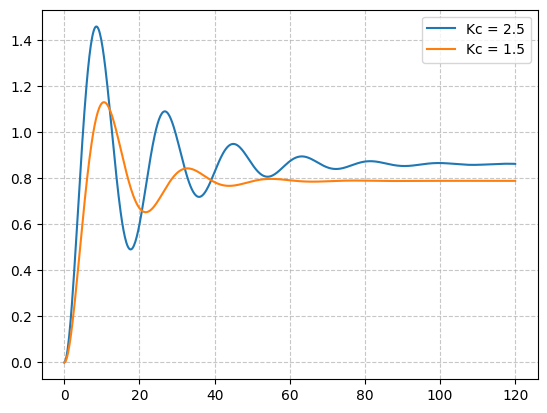

In [9]:
# Fechando a malha P:
sintoniaAB = [2.5, 1.5]
yset = 1.0

for Kc in sintoniaAB:
  Gc = PID(Kc)
  Gservo = ct.minreal(Gc*Gp/(1+Gc*Gp*Gm), verbose=False)
  p = Gservo.poles()
  print(f'Kc = {Kc}-->', p)

  # Comportameno dinâmico:
  t, y = ct.step_response(Gservo, T = 120)
  plt.plot(t, y, label=f'Kc = {Kc}')
  plt.grid(True, linestyle='--', alpha=0.7)
  plt.legend()









Kc = 2.5--> [-0.73577212+0.j         -0.03357951+0.33416408j -0.03357951-0.33416408j
 -0.04706887+0.j        ]
Kc = 1.5--> [-0.67653145+0.j         -0.06419616+0.26969331j -0.06419616-0.26969331j
 -0.04507623+0.j        ]


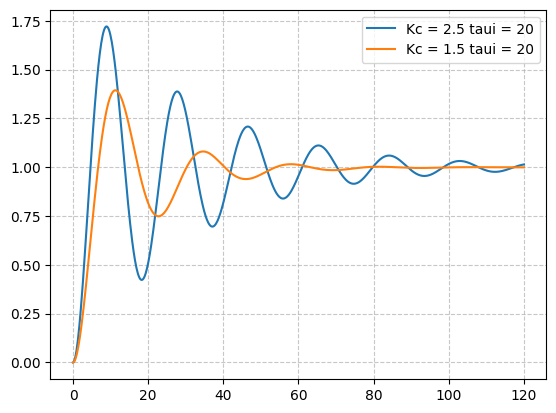

In [10]:
# Fechando a malha PID:
sintoniaAB = [[2.5, 20], [1.5, 20]]
yset = 1.0

for Kc, taui in sintoniaAB:
  Gc = PID(Kc, taui)
  Gservo = ct.minreal(Gc*Gp/(1+Gc*Gp*Gm), verbose=False)
  p = Gservo.poles()
  print(f'Kc = {Kc}-->', p)

  # Comportameno dinâmico:
  t, y = ct.step_response(Gservo, T = 120)
  plt.plot(t, y, label=f'Kc = {Kc} taui = {taui}')
  plt.grid(True, linestyle='--', alpha=0.7)
  plt.legend()


Kc = 2.5--> [-1.16085435+0.j         -0.47890016+0.j         -0.08026522+0.36727699j
 -0.08026522-0.36727699j -0.04971505+0.j        ]
Kc = 1.5--> [-1.10797094+0.j         -0.48196036+0.j         -0.10628779+0.28481151j
 -0.10628779-0.28481151j -0.04749311+0.j        ]


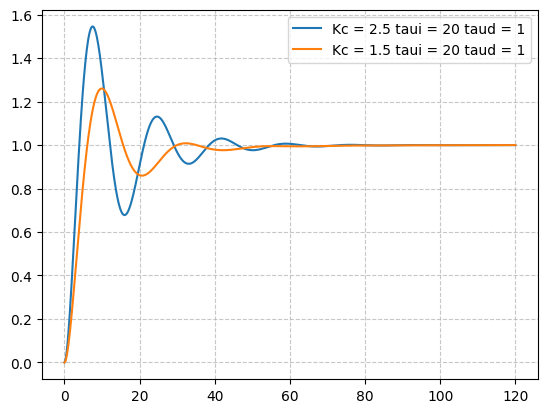

In [11]:
# Fechando a malha PID:
sintoniaAB = [[2.5, 20, 1], [1.5, 20, 1]]
yset = 1.0

for Kc, taui, taud in sintoniaAB:
  Gc = PID(Kc, taui, taud)
  Gservo = ct.minreal(Gc*Gp/(1+Gc*Gp*Gm), verbose=False)
  p = Gservo.poles()
  print(f'Kc = {Kc}-->', p)

  # Comportameno dinâmico:
  t, y = ct.step_response(Gservo, T = 120)
  plt.plot(t, y, label=f'Kc = {Kc} taui = {taui} taud = {taud}')
  plt.grid(True, linestyle='--', alpha=0.7)
  plt.legend()

Kc = 2.5--> [-0.74483726+0.j        -0.05258137+0.3448276j -0.05258137-0.3448276j
 -0.2       +0.j       ]
Kc = 1.5--> [-0.68454165+0.j         -0.08272917+0.28265306j -0.08272917-0.28265306j
 -0.2       +0.j        ]


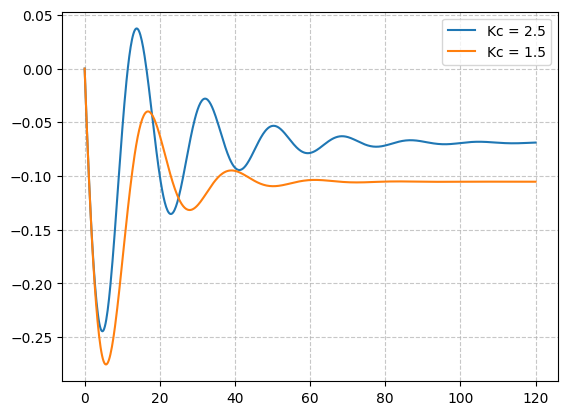

In [12]:
# Fechando a malha P:
sintoniaAB = [2.5, 1.5]
yset = 0

for Kc in sintoniaAB:
  Gc = PID(Kc)
  Greg = ct.minreal(Gd/(1+Gc*Gp*Gm), verbose=False)
  p = Greg.poles()
  print(f'Kc = {Kc}-->', p)

  # Comportameno dinâmico:
  t, y = ct.step_response(Greg, T = 120)
  plt.plot(t, y, label=f'Kc = {Kc}')
  plt.grid(True, linestyle='--', alpha=0.7)
  plt.legend()